<a href="https://colab.research.google.com/github/YasiruMM/Medicine-Prediction-Grp-22/blob/Diabetics_-Data_-Cleaning/Updated_Final_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Imports**##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = 'cleaned_diabetics.csv'
df = pd.read_csv(file_path)
df.head()

,Disease Category,Drug Category,Drug Name,Dosage,Retail Price,Purchase Price,Sales,Date
0,Diabetics,ALPHA GLUCO,DIABOSE 50MG,50MG,2020603.2,1.737413e+06,3427.0,2.24
1,Diabetics,ALPHA GLUCO,GLUCOBAY 100MG,100MG,421702.5,3.607105e+05,753.0,2.24
2,Diabetics,ALPHA GLUCO,GLUCOBAY 50MG,50MG,880.0,7.648481e+02,41.5,2.24
3,Diabetics,ALPHA GLUCO,GLUCOBAY 50MG,50MG,13511.0,2.143440e+04,52.0,2.24
4,Diabetics,ALPHA GLUCO,GLUCOBAY 50MG,50MG,12654.0,1.558440e+04,42.0,2.24


##**Calculate the mean sales and coefficient of variance (CV) for each drug**##

In [3]:
df['Mean Sales'] = df.groupby('Drug Name')['Sales'].transform('mean')
df['CV'] = df.groupby('Drug Name')['Sales'].transform(lambda x: x.std() / x.mean() * 100)

##**Assign Buffer Percentage based on CV**##

In [4]:
def buffer_percentage(cv):
    if cv <= 20:
        return 20
    elif 20 < cv <= 50:
        return 30
    else:
        return 50

In [5]:
#calculate buffer percentage
df['Buffer Percentage'] = df['CV'].apply(buffer_percentage)

In [6]:
# Calculate buffer stock
df['Buffer Stock'] = df['Buffer Percentage'] / 100 * df['Mean Sales']

##**Using capping for buffer stock**##

In [7]:
# Apply capping to Buffer Stock values
buffer_stock_lower_cap = df['Buffer Stock'].quantile(0.05)
buffer_stock_upper_cap = df['Buffer Stock'].quantile(0.95)
df['Buffer Stock'] = df['Buffer Stock'].clip(lower=buffer_stock_lower_cap, upper=buffer_stock_upper_cap)

# Round Buffer Stock to the nearest integer
df['Buffer Stock'] = df['Buffer Stock'].round().astype(int)

##**Plot Buffer Stock after capping**##

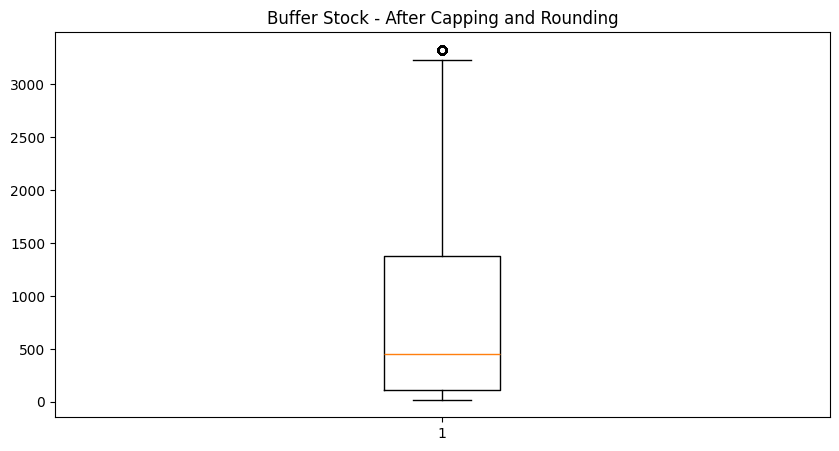

In [8]:
plt.figure(figsize=(10, 5))
plt.boxplot(df['Buffer Stock'])
plt.title('Buffer Stock - After Capping and Rounding')
plt.show()

In [10]:
from google.colab import files
df.to_csv('Finalised_Diabetics_Data.csv', index=False)
files.download('Finalised_Diabetics_Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>